In [19]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np

In [20]:
url1 = 'https://raw.githubusercontent.com/Revilsane/AnalyticsProject1/refs/heads/main/DATA/categories_brands.csv'
url2 = 'https://raw.githubusercontent.com/Revilsane/AnalyticsProject1/refs/heads/main/DATA/customers_orders_discount_rk.csv'
url3 = 'https://raw.githubusercontent.com/Revilsane/AnalyticsProject1/refs/heads/main/DATA/summer_customers.csv'
url4 = 'https://raw.githubusercontent.com/Revilsane/AnalyticsProject1/refs/heads/main/DATA/orders_staff.csv'
url5 = 'https://raw.githubusercontent.com/Revilsane/AnalyticsProject1/refs/heads/main/DATA/orders_stores.csv'
url6 = 'https://raw.githubusercontent.com/Revilsane/AnalyticsProject1/refs/heads/main/DATA/products.csv'
url7 = 'https://raw.githubusercontent.com/Revilsane/AnalyticsProject1/refs/heads/main/DATA/customers.csv'

**Функция, которая удаляет выбросы:**

In [21]:
def remove_outliers(column):

    column  = column.dropna()
    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return column[(column >= lower_bound) & (column <= upper_bound)]

**Функция, которая строит выбросы:**

In [22]:
def hist_col(column, title, x_title):
    plt.hist(column, bins = 30, density = True, label = 'Hist')

    mean_val = np.mean(column)
    median_val = np.median(column)
    plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Среднее = {mean_val:.2f}")
    plt.axvline(median_val, color="k", linestyle=":", linewidth=2, label=f"Медиана = {median_val:.2f}")

    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel('Частота')
    plt.legend()

# EDA АНАЛИЗ

**КАТЕГОРИИ ТОВАРОВ:**

In [23]:
df1 = pd.read_csv(url1)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     321 non-null    int64 
 1   category_id    321 non-null    int64 
 2   brand_id       321 non-null    int64 
 3   category_name  321 non-null    object
 4   brand_name     321 non-null    object
dtypes: int64(3), object(2)
memory usage: 12.7+ KB


In [25]:
x = df1['category_name']
unique, counts = np.unique(x,return_counts = True)

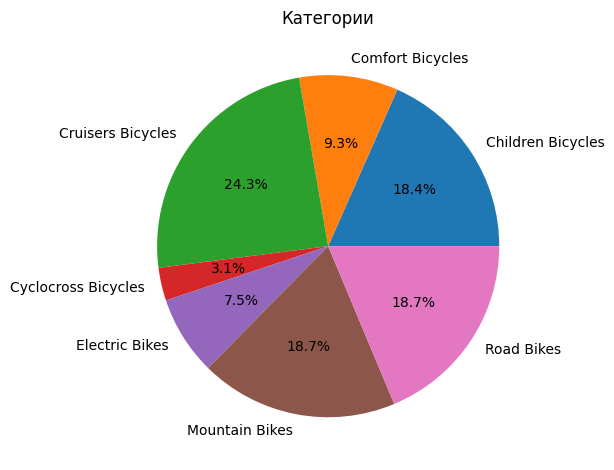

In [26]:
plt.pie(counts, labels=unique, autopct = '%1.1f%%')
plt.title("Категории")
plt.tight_layout()

**БРЕНДЫ:**

In [27]:
x = df1['brand_name']

Text(0.5, 0, 'Процент от всего рынка')

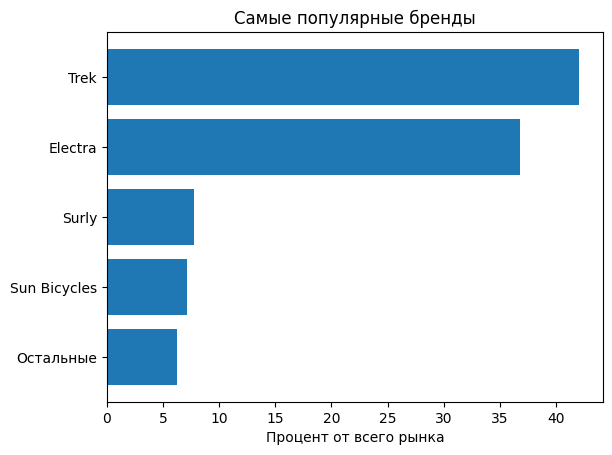

In [28]:
x, y = np.unique(df1.brand_name, return_counts = True)

ind = np.argsort(y)
y = (y[ind]/321)*100
x = x[ind]

y_top4 = y[::-1][:4]
y_others = y[::-1][4:]
other = sum(y_others)
y = list(y_top4) + [other]
x = list(x[::-1][:4]) + ['Остальные']

plt.barh(x[::-1],y[::-1])

plt.title('Самые популярные бренды')
plt.xlabel('Процент от всего рынка')

**ЗАКАЗЫ И СОТРУДНИКИ:**

In [29]:
df4 = pd.read_csv(url4)

In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   staff_id      6 non-null      int64 
 1   first_name    6 non-null      object
 2   last_name     6 non-null      object
 3   orders_count  6 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 324.0+ bytes


Text(0.5, 0, 'Количество заказов')

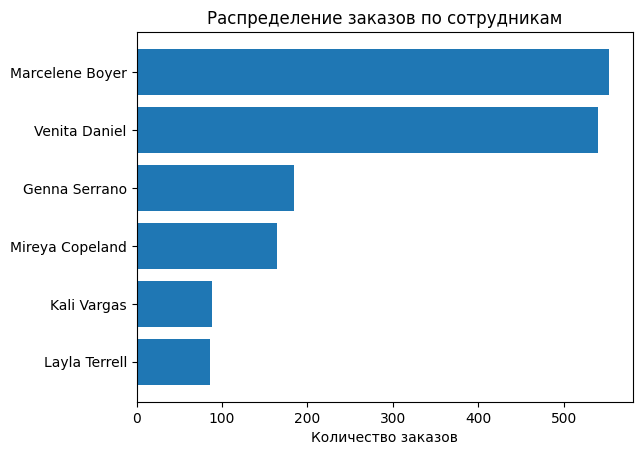

In [31]:
df4['full_name'] = df4['first_name'] + ' ' + df4['last_name']
x, y = df4.full_name,df4.orders_count

ind = np.argsort(y)
y = y[ind]
x = x[ind]

plt.barh(x,y)
plt.title('Распределение заказов по сотрудникам')
plt.xlabel('Количество заказов')

**ЗАКАЗЫ И МАГАЗИНЫ:**

In [32]:
df5 = pd.read_csv(url5)

In [33]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   store_id      3 non-null      int64 
 1   store_name    3 non-null      object
 2   city          3 non-null      object
 3   orders_count  3 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 228.0+ bytes


Text(0.5, 0, 'Количество заказов')

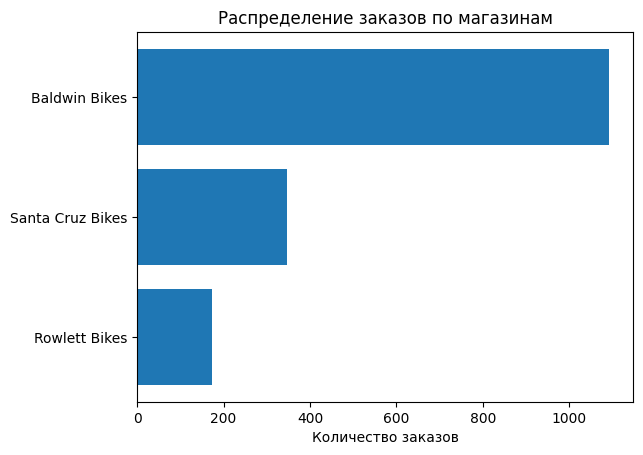

In [34]:
x, y = df5.store_name,df5.orders_count
ind = np.argsort(y)
y = y[ind]
x = x[ind]
plt.barh(x,y)
plt.title('Распределение заказов по магазинам')
plt.xlabel('Количество заказов')

**ТОВАРЫ:**

In [35]:
df6 = pd.read_csv(url6)

df6 = df6.drop(columns=['products'])


In [36]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    321 non-null    int64  
 1   product_name  321 non-null    object 
 2   brand_id      321 non-null    int64  
 3   category_id   321 non-null    int64  
 4   model_year    321 non-null    int64  
 5   list_price    321 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 15.2+ KB


In [37]:
x = df6.list_price

In [38]:
cleaned_x = remove_outliers(x)

**До удаления выбросов:**

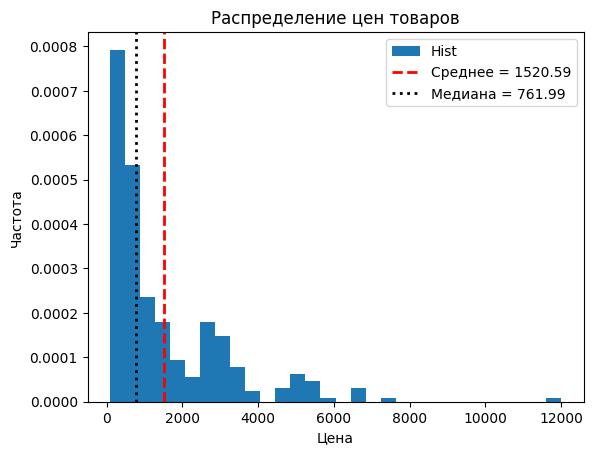

In [39]:
hist_col(x,'Распределение цен товаров', 'Цена')

**После удаления выбросов:**

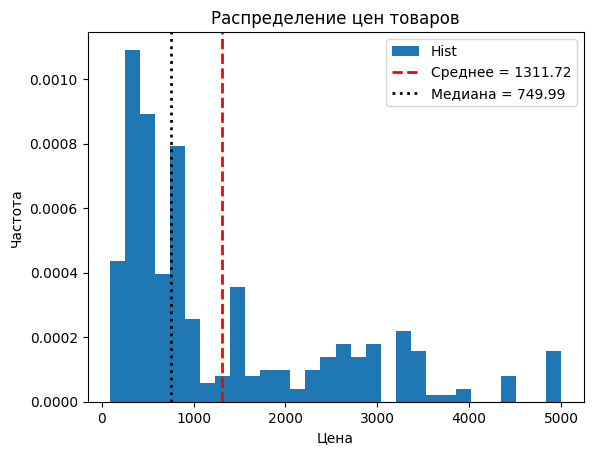

In [40]:
hist_col(cleaned_x,'Распределение цен товаров', 'Цена')

**Оценим распределение через ММП гистограмму с выбросами:**

In [41]:
theta_cleaned = np.mean(cleaned_x)
theta = np.mean(x)

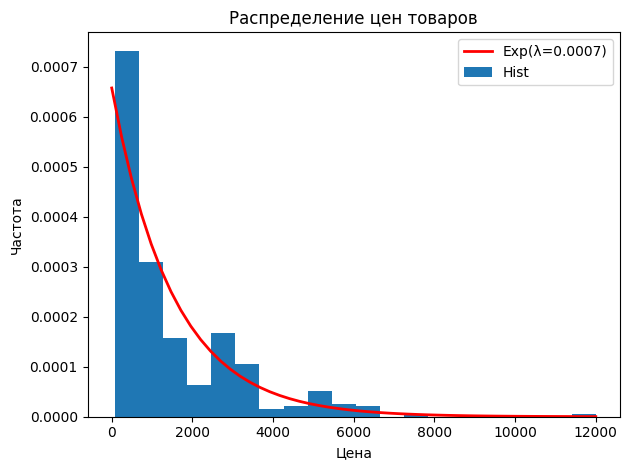

In [42]:
p = np.linspace(0, 12000)
pdf = (1/theta) * np.exp((-1/theta) * p)
plt.plot(p, pdf, 'r-', lw=2, label=f'Exp(λ={round(1/theta,4)})')

plt.hist(x, bins=20, density=True, label='Hist')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Распределение цен товаров')
plt.tight_layout()
plt.legend()

**ПОКУПАТЕЛИ:**

In [43]:
df7 = pd.read_csv(url7)

In [44]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1445 non-null   int64 
 1   first_name   1445 non-null   object
 2   last_name    1445 non-null   object
 3   city         1445 non-null   object
 4   state        1445 non-null   object
dtypes: int64(1), object(4)
memory usage: 56.6+ KB


Text(0.5, 0, 'Количество покупателей')

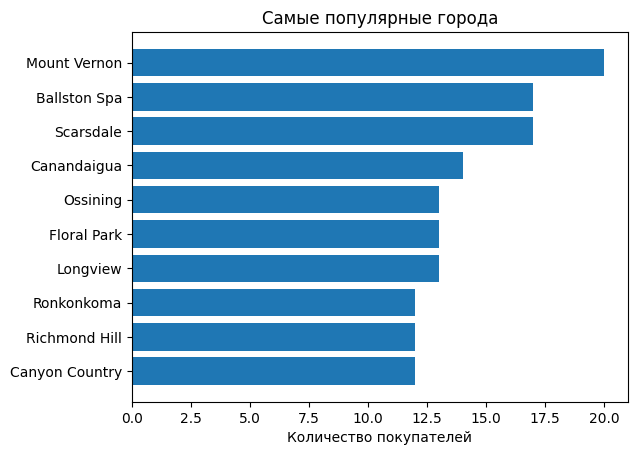

In [45]:
x, y = np.unique(df7.city, return_counts=True)

ind = np.argsort(y)
y = y[ind]
x = x[ind]

y_top10 = y[::-1][:10]
y_others = y[::-1][10:]
other = sum(y_others)
y = list(y_top10)
x = list(x[::-1][:10])

plt.barh(x[::-1],y[::-1])

plt.title('Самые популярные города')
plt.xlabel('Количество покупателей')

Text(0.5, 0, 'Количество покупателей')

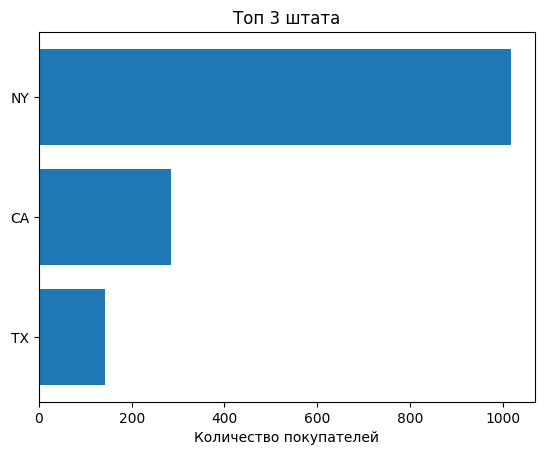

In [46]:
x, y = np.unique(df7.state, return_counts=True)

ind = np.argsort(y)
y = y[ind]
x = x[ind]


plt.barh(x,y)

plt.title('Топ 3 штата')
plt.xlabel('Количество покупателей')

# ГИПОТЕЗА: Влияет ли скидка >= 10 процентов на повторный заказ в будущем?

In [47]:
df2 = pd.read_csv(url2)
order1_10 = df2[(df2.discount >= 0.1) & (df2.rk == 1)] # 1 заказ с 20 процентой скидкой

In [48]:
customers_10 = order1_10['customer_id'].unique() # все покупатели, которые в 1 заказе получили скидку 10 процентов.

In [49]:
orders2_0 = df2[df2.customer_id.isin(customers_10)]
orders2 = orders2_0[orders2_0.rk >= 2]
customers_10_return = orders2['customer_id'].unique()

In [50]:
p = len(df2[df2.rk >= 2].customer_id.unique())/len(df2.customer_id.unique())
p_0 = round(p,2)
print('Вероятность повторной покупки или доля покупателей, совершивших хотя бы один повторный заказ', p_0)

Вероятность повторной покупки или доля покупателей, совершивших хотя бы один повторный заказ 0.09


**Основная гипотеза:**
$H_0$: p = 0.09

**Альтернативная гипотеза:**
$H_1$: p > 0.09



**Считаем, что наше распределение данных подчинятся биномиальному распеределнию $Binom(n_0,p_0)$**

**Q ~ $Binom(n_0, p_0)$**

**a = min(x: F(x) >= 0.95)**

**Критерий: Если Q > a, то отвергаем $H_0$**

In [51]:
n_0 = len(customers_10)
Q = len(customers_10_return)

In [52]:
binom_h0 = sps.binom(n=n_0, p=p_0)
x_grid = np.arange(1,n_0+1)
probs = binom_h0.pmf(x_grid)

a = binom_h0.ppf(0.95)
crit_reg = x_grid > a

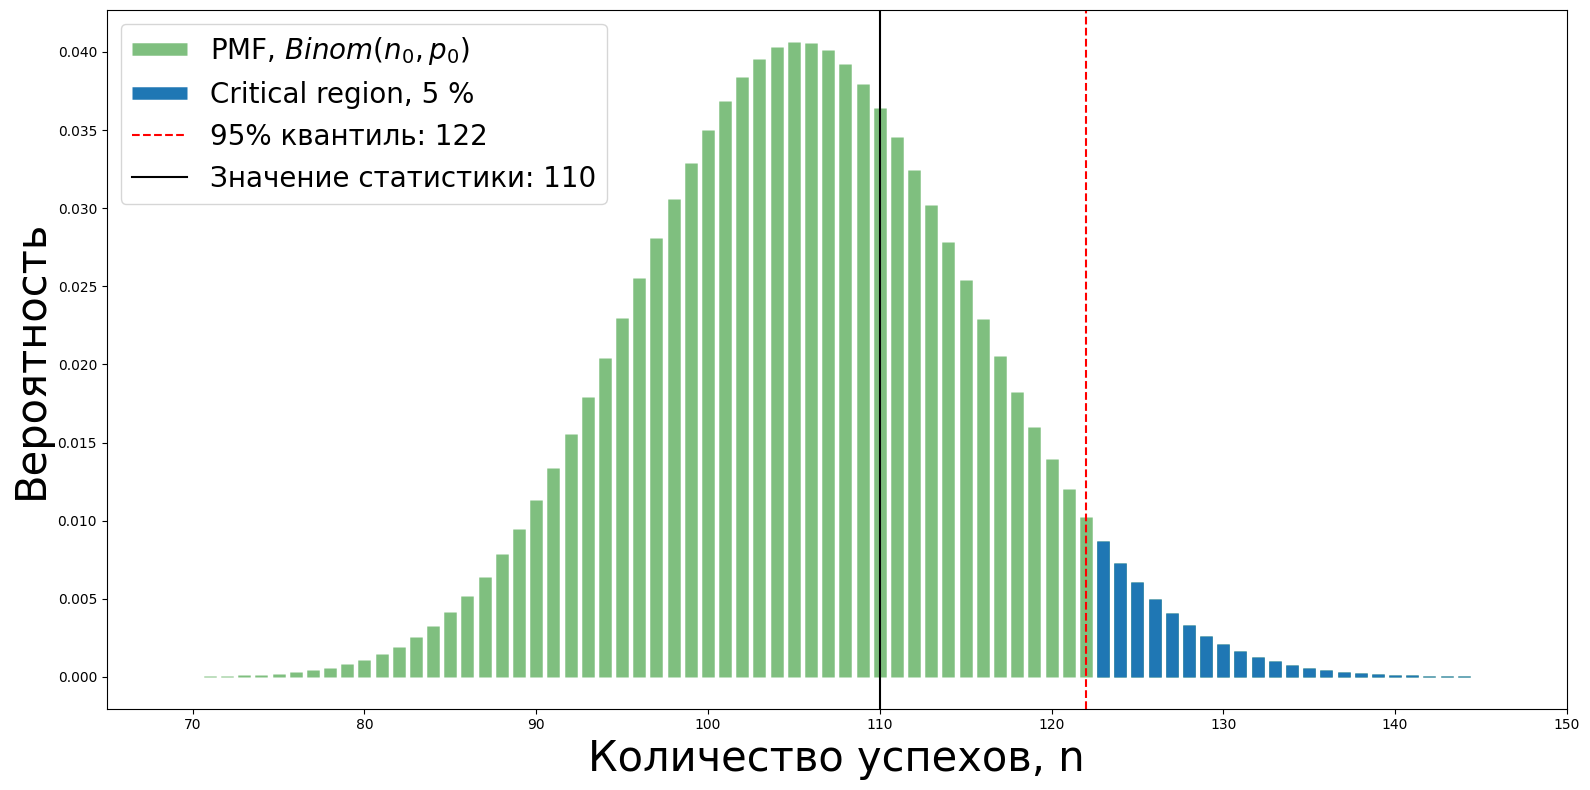

In [53]:
plt.figure(figsize = (16,8))

plt.vlines(x_grid, 0, probs, linewidth = 9.0, color='green', label = 'PMF, $Binom(n_0, p_0)$', alpha = 0.5)
plt.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth = 9.0, label = 'Critical region, 5 %')
plt.axvline(a, color='red', linestyle='--', label=f'95% квантиль: {int(a)}')
plt.axvline(Q, color='black', linestyle='-', label=f'Значение статистики: {int(Q)}')


plt.xlabel('Количество успехов, n', fontsize=30)
plt.xlim(65,150)
plt.ylabel('Вероятность', fontsize=30)
plt.legend(fontsize = 20)

plt.tight_layout()


**Посчитаем через p-value:**


In [54]:
p_val = 1 - binom_h0.cdf(Q-1)
print('P-value(Q): ',round(p_val,2))

P-value(Q):  0.35


**Не отвергаем гипотезу о том, что скидка >= 10 процентов не влияет на повышение вероятности повторного заказа.**

# ГИПОТЕЗА: C апреля по июнь средний чек больше, чем в остальное время

**Основная гипотеза**
$H_0$: Средний чек с апреля по июнь равен среднему чекому в остальное время

**Альтернативная гипотеза**
$H_1$: Средний чек с апреля по июнь больше среднего чека в остальное время

In [55]:
df3 = pd.read_csv(url3)
df3['order_date'] = pd.to_datetime(df3['order_date'])
df3['month'] = df3['order_date'].dt.month


In [56]:
df3['final sum'] = df3['quantity']*df3['list_price']*(1-df3['discount'])

In [57]:
summer_spring_customers = df3[(df3.month >= 4) & (df3.month <= 6)]
other_customers = df3[(df3.month < 4) | (df3.month > 6)]

In [58]:
x = summer_spring_customers['final sum']
y = other_customers['final sum']

**Функция, которая строит гистограмму:**

In [59]:
def hist_col(column, title, x_title):
    plt.hist(column, bins = 30, density = True, label = 'Hist')

    mean_val = np.mean(column)
    median_val = np.median(column)
    plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Среднее = {mean_val:.2f}")
    plt.axvline(median_val, color="k", linestyle=":", linewidth=2, label=f"Медиана = {median_val:.2f}")

    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel('Частота')
    plt.legend()

**Функция, которая удаляет выбросы:**


In [60]:
def remove_outliers(column):

    column  = column.dropna()
    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return column[(column >= lower_bound) & (column <= upper_bound)]

**Построим гистограммы:**

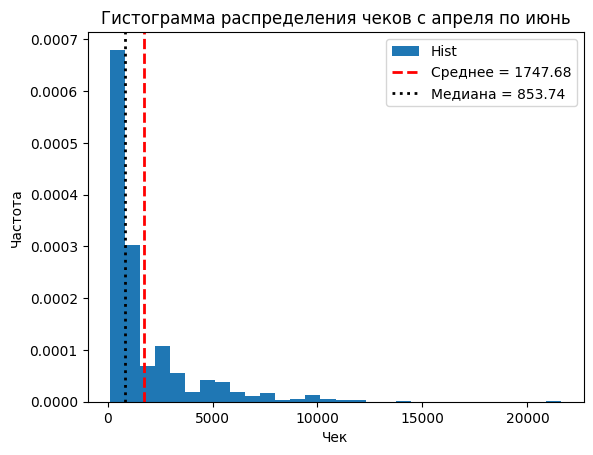

In [61]:
hist_col(x, 'Гистограмма распределения чеков с апреля по июнь', 'Чек')

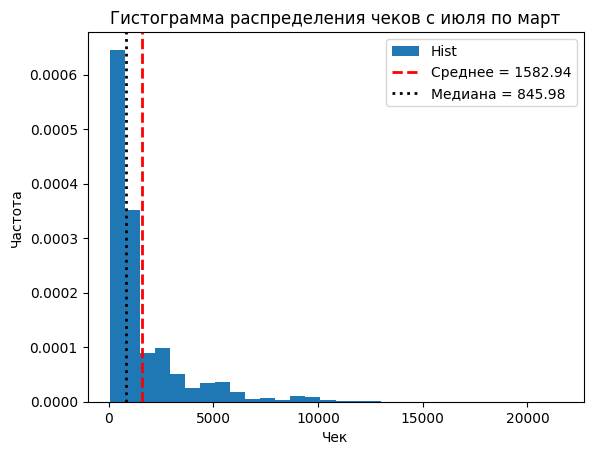

In [62]:
hist_col(y, 'Гистограмма распределения чеков с июля по март', 'Чек')

**Проведем двувыборчный t-test с такими распределениями для определения стат. значимости различия средних чеков:**

In [63]:
stat, p_val = sps.ttest_ind(x,y, equal_var=False)
if p_val < 0.05:
  print('Отвергаем основную гипотезу, p-value: ',round(p_val,3))
else:
  print('Не отвергаем основную гипотезу')

Отвергаем основную гипотезу, p-value:  0.018


**Удалим выбросы и проведем t-test для очищенных данных:**

In [64]:
cleaned_x = remove_outliers(x)
cleaned_y = remove_outliers(y)

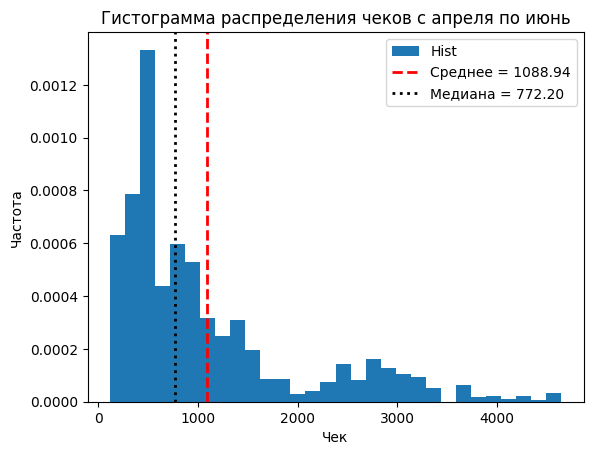

In [65]:
hist_col(cleaned_x, 'Гистограмма распределения чеков с апреля по июнь', 'Чек')

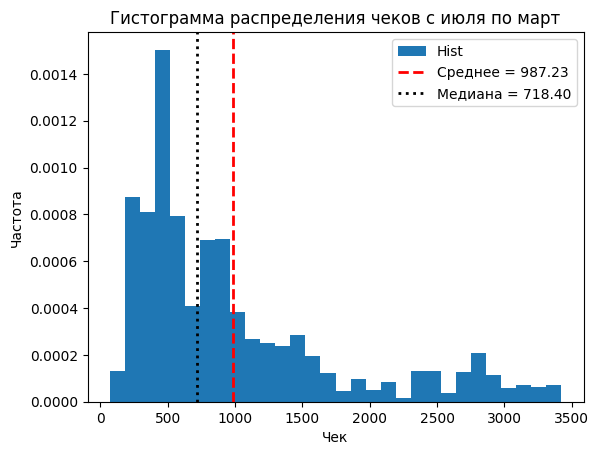

In [66]:
hist_col(cleaned_y, 'Гистограмма распределения чеков с июля по март', 'Чек')

In [67]:
stat, p_val = sps.ttest_ind(cleaned_x,cleaned_y, equal_var=False)
if p_val < 0.05:
  print('Отвергаем основную гипотезу, p-value: ',round(p_val,3))
else:
  print('Не отвергаем основную гипотезу')

Отвергаем основную гипотезу, p-value:  0.001


**Используем бутстреп для определения стат. значимости:**